In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable, Tuple

# Bissection Method
The Bissection method works by evaluating a function in an interval. It's necessary that the interval contains a root to the funcion.
At each iteration, the interval will be splitted in half, then the function is evaluated at the mid point. The next interval will be defined by one of the old extemities and the mid point. The extremitie that will be replaced by the mid point is the one that has the same sign as the function in the mid point.

This method has a property of alway converging to a root (when there is one in the interval) with a conversion factor of 1.
This method also can be implemented in a concurrent way, and instead of splitting the interval in half, one could split the interval in N parts and make N function evaluations in parallel, thus speeding the conversion with less iterations.

The implementation bellow is done in a recursive way, where there is two stop conditions, the tol and the iterations.

In [2]:
def bissection(
      f: Callable[[float], float], 
      a: float, 
      b: float, 
      tol: float, 
      iterations:int
      ) -> float:
    if iterations < 0:
      raise ValueError("Iterations cannot be less than 0")
    
    f_a : float = f(a)
    f_b : float = f(b)
    mid_point : float = (a + b) / 2.0
    f_mid : float = f(mid_point)
    
    if iterations == 0 or abs(f_mid) < tol:
       return mid_point
    else:
       if f_a * f_mid < 0:
          return bissection(f, a, mid_point, tol, iterations - 1)
       else:
          return bissection(f, mid_point, b, tol, iterations - 1)

# False Position Method 

The false position method is very similar to the bissection, except that the interval is not splitted in half, it is an weighted average of the extremities and their error. This method always converge to a root.


In [3]:
def false_position(
    f: Callable[[float], float],
    a : float, 
    b : float, 
    tol : float,
    iterations:int
    ) -> float:
    if iterations < 0:
      raise ValueError("Iterations cannot be less than 0")
    
    f_a : float = f(a)
    f_b : float = f(b)
    mid_point : float = (a * f_b - b * f_a) / (f_b - f_a)
    f_mid : float = f(mid_point)
    
    if iterations == 0 or abs(f_mid) < tol:
       return mid_point
    else:
       if f_a * f_mid < 0:
          return false_position(f, a, mid_point, tol, iterations - 1)
       else:
          return false_position(f, mid_point, b, tol, iterations - 1)

# Newton-Rhapson Method

The Newton-Rhapson method works by following the solpe of the funcion, and for that it needs the derivate of the function. This method, in contrast to the first two, is not guaranteed to converge, however when it does converge, it is the fastest with a conversion factor of 2.

When considering concurrent implementations of this method, one could evaluate the function and it's derivative at the same time.

In [4]:
def newton_rhapson_method(
    f: Callable[[float], float],
    df: Callable[[float], float],
    guess: float,
    tol: float,
    iterations: int
  ) -> float:
  if iterations < 0:
    raise ValueError("Iterations cannot be less than 0")
  
  f_guess = f(guess)
  df_guess = df(guess)

  if iterations == 0 or abs(f_guess) < tol:
    return guess
  else:
    new_guess = guess - f_guess / df_guess
    return newton_rhapson_method(f, df, new_guess, tol, iterations - 1)

# Secant Method

The secant method is a variation of the Newton-Rhapson method, where is not necessary the derivative of the function. It will be made and approximation. 
In the following implementation, a derivative approximation function is created by sampling the original function in two points very near the $x$ input. Currently the offset from x used is 0.0000001 (1e-7).

This method has a convergence factor of 1.618 ((1 + sqrt(5)) / 2)

In [5]:
def secant_method(
    f: Callable[[float], float],
    guess: float,
    tol: float,
    iterations: int
  ) -> float: 
  df_approximation = lambda x: (f(x + 1e-7) - f(x - 1e-7)) / 2e-7
  return newton_rhapson_method(f, df_approximation, guess, tol, iterations)

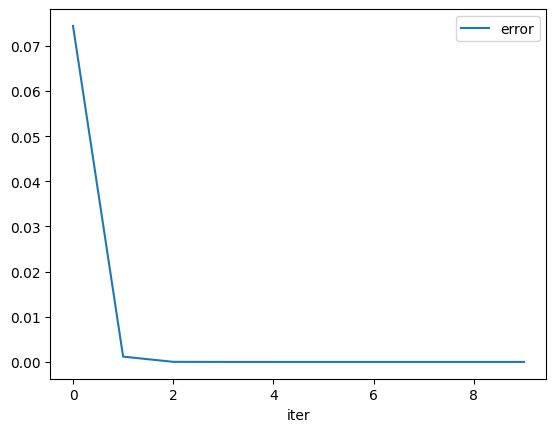

   iter         error
0     0  7.441880e-02
1     1  1.175242e-03
2     2  1.838657e-05
3     3  2.876139e-07
4     4  4.499021e-09
5     5  7.037571e-11
6     6  1.100453e-12
7     7  1.776357e-14
8     8  8.881784e-16
9     9  8.881784e-16
0.5768875239163401


In [40]:
iterations = 10
function = lambda x: x ** 3 - 9 * x + 5
a = 0.5
b = 1.0

error = []

for it in range(iterations):
    mid = false_position(function, a, b, 0.0, 0)

    f_a = function(a)
    # f_b = function(b)
    f_mid = function(mid)

    if f_a * f_mid < 0.0:
        b = mid
    else:
        a = mid
            
    error.append(abs(f_mid))
    
df_errors = pd.DataFrame(data=[{"iter": it, "error" : val} for it, val in enumerate(error)], columns=["iter", "error"])
df_errors.plot(x="iter", y="error")
plt.show()
print(df_errors)
print(mid)


In [7]:
bissection(lambda x: x**3 -9*x + 5, 0.5, 1.0, 0.05, 5)

0.578125

In [8]:
false_position(lambda x: x**3 -9*x + 5, 0.5, 1.0, 0.05, 5)

0.5770344044260434

In [13]:
fn = lambda x: x**2 - 5
d_fn = lambda x: 2*x
newton_rhapson_method(fn, d_fn, 3.0, 10e-4, 5)

2.2360688956433634

In [14]:
fn = lambda x: x**2 - 5
secant_method(fn, 3.0, 10e-4, 5)

2.2360688956392814

In [12]:
fn = lambda x: x**2 - 5
d_fn = lambda x: 2*x
guess_newton = 3.0
guess_secant = 3.0
for it in range(0, 5):
  guess_newton = newton_rhapson_method(fn, d_fn, guess_newton, 10e-4, 1)
  guess_secant = secant_method(fn, guess_secant, 10e-4, 1)
  print(f"secant = {guess_secant}, newton = {guess_newton}, abs dif = {abs(guess_secant - guess_newton):.10f}")

secant = 2.333333332242281, newton = 2.3333333333333335, abs dif = 0.0000000011
secant = 2.238095237909163, newton = 2.238095238095238, abs dif = 0.0000000002
secant = 2.2360688956392814, newton = 2.2360688956433634, abs dif = 0.0000000000
secant = 2.2360688956392814, newton = 2.2360688956433634, abs dif = 0.0000000000
secant = 2.2360688956392814, newton = 2.2360688956433634, abs dif = 0.0000000000
